# Hello and welcome to notebook 2!

In this notebook, we are going to perform some Exploratory Data Analysis (or EDA) on our data. This will include learning about:
* The `pandas` Python library
* Using the `seaborn` library to generate histograms
* Creating word clouds

It is recommended that you complete all exercises that are not marked as optional.

Feel free to be creative and write your own code wherever you want!

The provided functions are only there to help you if you get stuck :)

## Imports

In [2]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

ModuleNotFoundError: No module named 'wordcloud'

## Lesson 1: Pandas

In this lesson we will explore our 'sarcastic headlines' dataset for the first time!

We'll be loading the data with the Python library `pandas` in an object called a `DataFrame`. 

This is essentially a table that we can use special `pandas` commands on to easily access and manipulate our data. 

In [5]:
# Define the path to the data
fp = '../data/train_df.csv'

# Load the data as a pandas DataFrame
df = pd.read_csv(fp)

# Calling .head() on a dataframe lets us see the first five rows
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


The following cells introduce some of the basic `DataFrame` operations. Some of them may seem confusing at first, but once you learn how to use `pandas` properly you'll come to love it!

If you ever get stuck with `pandas`, take a look at the documentation:
* https://pandas.pydata.org/pandas-docs/stable/index.html

It's really clear and helpful!

In [7]:
# We can access a single column of the dataframe like so:
df['headline']

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
25857                 american politics in moral free-fall
25858                              america's best 20 hikes
25859                                reparations and obama
25860    israeli ban targeting boycott supporters raise...
25861                    gourmet gifts for the foodie 2014
Name: headline, Length: 25862, dtype: object

In [8]:
# Add .values to the end if you just want an array of the entries:
df['headline'].values

array(["former versace store clerk sues over secret 'black code' for minority shoppers",
       "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
       "mom starting to fear son's web series closest thing she will have to grandchild",
       ..., 'reparations and obama',
       'israeli ban targeting boycott supporters raises alarm abroad',
       'gourmet gifts for the foodie 2014'], dtype=object)

In [154]:
# Multiple columns are accessed using a list:
df[['is_sarcastic', 'headline']]

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
...,...,...
28614,1,jews to celebrate rosh hashasha or something
28615,1,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...
28617,1,mars probe destroyed by orbiting spielberg-gat...


In [10]:
# A single row can be pulled out using its index:
df.iloc[0]

article_link    https://www.huffingtonpost.com/entry/versace-b...
headline        former versace store clerk sues over secret 'b...
is_sarcastic                                                    0
Name: 0, dtype: object

In [11]:
# And we can access multiple rows using slicing...
df.iloc[2:5]

,article_link,headline,is_sarcastic
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [12]:
#...or a list
df.iloc[[1, 3, 7]]

,article_link,headline,is_sarcastic
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0


In [13]:
# A special type of indexing can be used to filter our dataframe down to sarcastic headlines only:
df[df.is_sarcastic == 1]

,article_link,headline,is_sarcastic
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
15,https://entertainment.theonion.com/nuclear-bom...,nuclear bomb detonates during rehearsal for 's...,1
16,https://www.theonion.com/cosby-lawyer-asks-why...,cosby lawyer asks why accusers didn't come for...,1
...,...,...,...
25846,https://www.theonion.com/new-bailiff-tired-of-...,new bailiff tired of hearing how old bailiff d...,1
25847,https://www.theonion.com/breaking-the-onion-in...,breaking: 'the onion' in kill range of boston ...,1
25848,https://www.theonion.com/seaworld-crowd-applau...,seaworld crowd applauds for dolphin playfully ...,1
25855,https://politics.theonion.com/pentagon-to-with...,pentagon to withhold budget figures out of res...,1


In [113]:
# Q1.2 - How many saracastic headlines are there?
#      - How many are genuine?
#      - Do you think the ratio of sarcastic headlines to genuine ones will allow us to train a good classifier?

In [204]:
# Q1.3 - Using the pandas documentation, work out how to add a new column 'headline_length' to 
#      - the dataframe that contains the length of (i.e. the number of characters in) each headline.
#      - Which headline is the longest?
#      - Which headline is the shortest?
#      - Is headline length something that we could use when classifying the sarcastic headlines?

## Lesson 2: Histograms
Histograms are a great way to quickly visualise distributions within our data. In Python, they can be produced using the `matplotlib` or `seaborn` libraries. We'll use `seaborn` here as it has good integration with `pandas` and produces slightly prettier plots!

The function ```plot_headline_char_lengths``` plots histograms of the number of characters in the sarcastic and genuine headlines.

In [29]:
def plot_headline_char_lengths(df):
    # Get lists of the genuine headline lengths
    genuine = df[df['is_sarcastic'] == 0]
    lengths_genuine = genuine['headline'].str.len()
    
    # Get a list of the sarcastic headline lengths
    sarcastic = df[df['is_sarcastic'] == 1]
    lengths_sarcastic = sarcastic['headline'].str.len()
    
    # Set the plot size
    plt.figure(figsize=(10,8))
    
    # Comment out one of the following two lines to plot distributions one at a time
    sns.histplot(lengths_genuine, label='0 - Genuine', color='blue')
    sns.histplot(lengths_sarcastic, label='1 - Sarcastic', color='red')
    
    plt.legend()

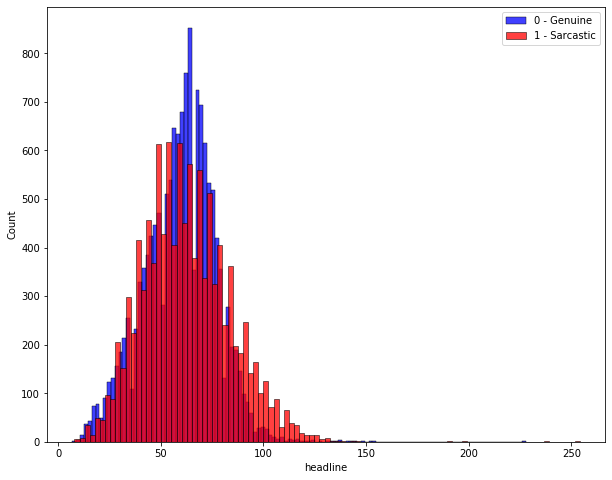

In [30]:
plot_headline_char_lengths(df)

In [114]:
# Q2.1 - What do you notice about the distribution of message lengths for the sarcastic
#        and non-sarcastic headlines? Is this what you'd expect?

In [ ]:
# Q2.2 - Use the new column 'headline_length' that you added to the dataframe in Q1.3 to improve
#      - the `plot_headline_char_lengths` function.

In [115]:
# Q2.3 - Complete the function ```plot_headline_word_count``` below.
#      - HINT: Remember the .split() method from the PreparingTextData notebook...?

In [31]:
def plot_headline_word_count(df):
    # TO DO: Get lists of word count for sarcastic and genuine
    
    # Set the plot size
    plt.figure(figsize=(10,8))
    
    # TO DO: Plot the histograms (distributions) for sarcastic and genuine

    # Add a legend to the plot
    plt.legend()

2020-12-09 15:23:19,759 [9583] WARNING  matplotlib.legend:1282: [JupyterRequire] No handles with labels found to put in legend.


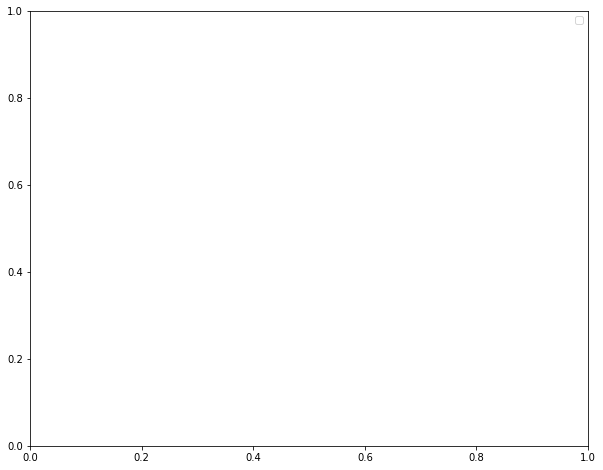

In [32]:
plot_headline_word_count(df)

## Lesson 3: Word clouds
A word cloud is a way of visualising text data in which the size of each word depends on how often it occurs in the text. In this lesson we will create word clouds for the sets of all, sarcastic, and genuine headlines.

To start off, we use Python's `.join()` method to turn all of the headlines into one long string!

In [33]:
headlines = ' '.join(df['headline'].values)
print(headlines[:100])

former versace store clerk sues over secret 'black code' for minority shoppers the 'roseanne' reviva


In [35]:
# Q3.1 - Use the `.join()` method to write the word 'bananas' from the list ['b', 'n', 'n', 's']

list_to_join = ['b', 'n', 'n', 's'] # You're not allowed to modify this list!

# TO DO: Use .join() with list_to_join to print the word 'bananas'

Now we can use the function `create_word_cloud` below to generate our word cloud!

In [36]:
def create_word_cloud(text):
    # Create a word cloud
    wc = WordCloud()
    wordcloud = wc.generate(text)

    # Display the generated image
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

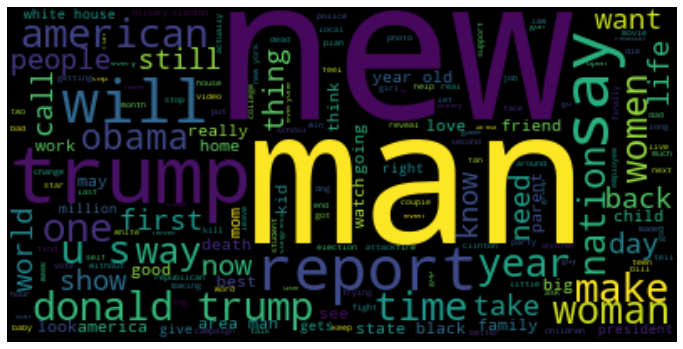

In [37]:
create_word_cloud(headlines)

In [56]:
# Q3.2 - Try changing some of the parameters of `WordCloud` in the `create_word_cloud` function.
#      - Can you produce a word cloud with black writing on a white background?
#      - HINT: You can open the docs for `WordCloud` by clicking after `WordCloud(` and pressing
#      - Shift + Tab.

In [57]:
# Q3.3 - Produce two additional word clouds: one for the genuine headlines only, and one for
#      - the sarcastic headlines.
#      - What do you notice about the largest words in each cloud?